In [49]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
DATA = '.'

### 🤑 Annual Income & Loan

In [3]:
loans_income = pd.read_csv(DATA + '/loans_income.csv')
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


### 표본의 크기와 표본 통계량의 분포 

###### sample 함수 test

In [5]:
loans_income.sample(5)

,x
6084,140000
10933,75000
21435,19000
18471,170000
44249,47800


In [6]:
loans_income.sample(5).mean()

x    81000.0
dtype: float64

In [15]:
type(loans_income.sample(5))

pandas.core.frame.DataFrame

In [23]:
list(loans_income.sample(5).x)

[35000, 47245, 80000, 40000, 82000]

In [29]:
loans_income.sample(5).mean().x

99600.0

###### done

In [24]:
sample_data = pd.DataFrame({'income': list(loans_income.sample(1000).x), 'type': ['Data'] * 1000})

In [25]:
sample_data

,income,type
0,41000,Data
1,95000,Data
2,41000,Data
3,61000,Data
4,63200,Data
...,...,...
995,80000,Data
996,70000,Data
997,153000,Data
998,66000,Data


In [30]:
sample_5 = [loans_income.sample(5).mean().x for _ in range(1000)]
sample_mean_05 = pd.DataFrame({'income': sample_5, 'type':'Mean of 5',})
sample_20 = [loans_income.sample(20).mean().x for _ in range(1000)]  
sample_mean_20 = pd.DataFrame({'income': sample_20, 'type':'Mean of 20',})

In [31]:
sample_mean_05 # 평균이라 소수점이 나올 수 밖에 없음 

,income,type
0,68614.8,Mean of 5
1,80600.0,Mean of 5
2,65824.0,Mean of 5
3,68447.8,Mean of 5
4,70600.0,Mean of 5
...,...,...
995,58112.4,Mean of 5
996,43961.6,Mean of 5
997,71106.4,Mean of 5
998,58440.0,Mean of 5


In [33]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
len(results)

3000

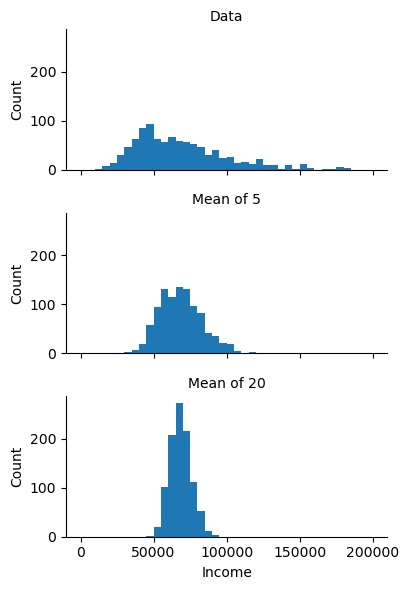

In [38]:
# col: 열 이름 (컬럼 기준으로 그리드 분할), col_wrap: 열 수 제한 (자동 줄바꿈), height: 각 서브플롯의 높이, aspect: 높이 대비 너비 비율
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40) # range 주의
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

### 👢Bootstrap

In [41]:
from sklearn.utils import resample

In [42]:
test = resample(loans_income)
len(test), len(loans_income)

(50000, 50000)

In [44]:
results = []
for n_repeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics: ')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics: 
original: x    62000.0
dtype: float64
bias: x   -79.068
dtype: float64
std. error: 224.77617913539393


### QQ plot

In [45]:
sp500_px = pd.read_csv('/Users/youngeun/prac_stat/data/sp500_data.csv.gz', index_col=0)

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727085, 0.0015561067366313861, 0.9941828221936319))

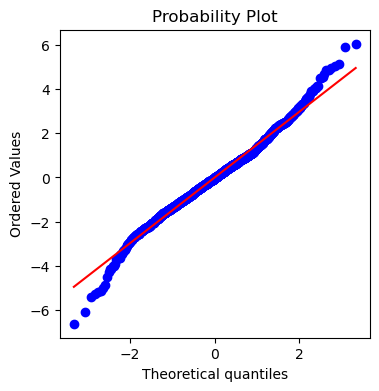

In [50]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
flg, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

### Various distributions

In [51]:
stats.binom.pmf(2, n=5, p=0.1) # binomial

0.07289999999999995

In [52]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

In [53]:
stats.poisson.rvs(2, size=100) # poisson, rvs: random variates (variates, 변량: 특정 확률 분포로부터 나온 무작위 값)

array([4, 1, 0, 0, 0, 2, 3, 4, 2, 0, 1, 1, 0, 5, 1, 2, 0, 3, 2, 3, 3, 5,
       3, 1, 2, 0, 0, 4, 1, 4, 0, 4, 3, 3, 2, 3, 7, 5, 3, 3, 4, 1, 3, 5,
       2, 2, 2, 0, 3, 0, 3, 3, 3, 3, 4, 4, 3, 4, 1, 1, 1, 1, 3, 1, 2, 1,
       4, 2, 3, 5, 1, 2, 1, 4, 4, 3, 0, 2, 1, 1, 2, 2, 3, 1, 1, 5, 0, 1,
       1, 4, 3, 1, 0, 0, 1, 4, 1, 3, 1, 1])

In [54]:
stats.expon.rvs(scale=1/0.2, size=100) # exponential

array([ 3.1432967 , 13.12548003,  2.66135652,  1.81977228,  0.14174255,
        2.3692596 ,  1.52292016,  2.27853528,  1.76566192,  5.06151133,
        3.07426043, 14.78361721,  0.68620242, 10.61797523,  8.4048371 ,
        9.29463492,  2.89363107,  1.24220471,  1.75282779, 14.89672569,
        1.67696591,  4.03981007,  6.49254768,  4.11682332,  1.68906764,
        0.79180856,  1.02175697,  1.2905045 ,  4.80769512,  8.57700775,
        0.2172191 ,  3.13072991,  0.56586854,  2.25360168,  1.38548634,
        1.40602194,  0.99188888,  2.90692796,  5.62590534,  2.95409395,
        0.14678262,  2.87568328,  7.12594854,  1.27631497, 12.14105281,
        2.95315951,  7.00656436,  4.83519053,  4.2871617 ,  1.55419001,
        8.41418201,  0.88383671,  0.16989065,  3.82457956,  4.64758045,
        5.12322164,  9.57314367,  6.6682014 , 12.63809292,  0.96625536,
        6.35258965,  2.27443203,  2.44564058,  1.06731649,  0.35417151,
        1.14132105,  1.91213008,  2.29212922,  0.57957189,  5.89

In [55]:
stats.weibull_min.rvs(1.5, scale=5000, size=100) # weibull

array([ 6956.12476933,  2733.12185256,  2448.02723004,  2229.19766698,
         251.0051604 ,   854.32857086, 11732.05341088,  3686.65016828,
       11176.8976917 ,  5166.92160429,  1282.88174048,  6235.16633984,
        1866.83425664,  4678.67983158,   827.33590755,  5196.35220149,
        7383.02027998,  7868.7190045 ,  6021.44757989,  6485.64389633,
        6579.95440399,  6866.45243233,  8792.19875995,  2108.10866388,
        1756.05795143,  3260.40214719,  4148.55555626,  5255.04043595,
        5525.31399752,  2034.6314357 ,  3922.32364422,  2527.09479936,
        6309.02794223,  1598.1682744 ,  3514.12998202,  6121.21959851,
        2297.4351761 ,  4890.80981854,  4630.17469986,  3800.43390107,
        5261.43518515,  7963.47195148, 10001.28487747,  2502.77438538,
        5736.78204877, 13334.07763292,  6540.6339009 ,  2754.92901649,
        8349.32001829,  8017.99977386,  2950.83872955, 10921.36145884,
        4616.03313782,  3260.42824015,  6694.37633158,  1447.81128742,
      